In [156]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [157]:
plt.rcParams['font.family'] = 'Helvetica'

In [158]:
#results_dir = '../results/assoc_contemp_lagged_ksu_lag3_months_2024-06-13_09_24_10.962396/'
#results_dir = '../results/bin_12months_slopeTrue_weeks_2024-06-11_12_37_11.943781/'
units = 'months'
model = 'bin'
slope = True
reorder = False

if units == 'months' and slope:
    results_dir = '../results/bin_5months_slopeTrue_months_2024-06-30_09_10_38.210285/'
elif units == 'weeks' and slope:
    results_dir = '../results/bin_5months_slopeTrue_weeks_2024-06-30_09_28_11.630821/'
elif units == 'months' and (not slope):
    results_dir = '../results/bin_5months_slopeFalse_months_2024-06-30_09_08_51.464113/'    
elif units == 'weeks' and (not slope):
    results_dir = '../results/bin_5months_slopeFalse_weeks_2024-06-30_09_26_57.885004/'

df = pd.read_csv(results_dir + model + '_df_' + units + '_all_primary.csv').rename(columns={'Unnamed: 0': 'category'})

annot_df = pd.read_csv(results_dir +'annot_' + model + '_df_' + units + '_all_primary.csv').rename(columns={'Unnamed: 0': 'category'})

In [159]:
annot_df

,category,FOK,Cowspiracy,Okja/WTH,TGC,YAWYE,All
0,Searches: `Plant based',***,**,*,**,*,NaN
1,Searches: `Vegan',*,***,*,NaN,NaN,NaN
2,Searches: `Vegetarian',NaN,NaN,NaN,NaN,NaN,NaN
3,Beef Demand,NaN,NaN,NaN,NaN,NaN,NaN
4,Pork Demand,NaN,NaN,NaN,*,NaN,NaN
5,Chicken Demand,NaN,NaN,NaN,NaN,NaN,NaN
6,StewartMilk,NaN,NaN,NaN,NaN,NaN,NaN
7,StewartPBMilk,NaN,*,NaN,NaN,NaN,NaN
8,Zhao,NaN,NaN,NaN,NaN,NaN,NaN
9,"Searches: `Vegan', Informative",*,***,NaN,NaN,NaN,NaN


In [160]:
selected_rows = None
#selected_rows = ['Beef Demand', 'Pork Demand', 'Chicken Demand']

In [161]:
if selected_rows:
    df = df.query('Outcome in @selected_rows')
    annot_df = annot_df.query('category in @selected_rows')

annot_df

,category,FOK,Cowspiracy,Okja/WTH,TGC,YAWYE,All
0,Searches: `Plant based',***,**,*,**,*,NaN
1,Searches: `Vegan',*,***,*,NaN,NaN,NaN
2,Searches: `Vegetarian',NaN,NaN,NaN,NaN,NaN,NaN
3,Beef Demand,NaN,NaN,NaN,NaN,NaN,NaN
4,Pork Demand,NaN,NaN,NaN,*,NaN,NaN
5,Chicken Demand,NaN,NaN,NaN,NaN,NaN,NaN
6,StewartMilk,NaN,NaN,NaN,NaN,NaN,NaN
7,StewartPBMilk,NaN,*,NaN,NaN,NaN,NaN
8,Zhao,NaN,NaN,NaN,NaN,NaN,NaN
9,"Searches: `Vegan', Informative",*,***,NaN,NaN,NaN,NaN


In [162]:
for col in annot_df.columns:
    if col == 'category':
        continue
    annot_df[col + '_an'] = annot_df[col]
    annot_df = annot_df.drop([col],axis=1)

In [163]:
#reordering = [0, 9, 12, 1, 7, 10, 2, 8, 11, 3, 4, 6]
if units == 'weeks':
    if reorder:
        reordering = [0,1,2,3,4,5,12,13,14,8, 11, 6, 9, 7, 10]#[9, 12, 7, 10, 8, 11, 3, 4, 6]
        df = df.reindex(reordering).reset_index(drop=True)
    df = df.rename(columns={'Outcome': 'category'})
    df = df.merge(annot_df, on='category', how='inner')
    
    """
    # Create merged annot_df
    meat_demand_categories = ['Beef Demand', 'Pork Demand', 'Chicken Demand']
    annot_df_months_meat = annot_df_months.query('category in @meat_demand_categories')
    
    annot_df_weeks = pd.concat([annot_df_weeks, annot_df_months_meat])
    
    """
    
elif units == 'months':
    if reorder:
        reordering = [0, 1, 2, 6, 7, 8, 3, 4, 5,  11, 14, 9, 12, 10, 13]
    
        df = df.reindex(reordering).reset_index(drop=True)
    df = df.rename(columns={'Outcome': 'category'})
    df = df.merge(annot_df, on='category', how='inner')

In [164]:
df['category'] = df['category'].map({'StewartMilk': 'Milk Purchase', 'StewartPBMilk': 'Plant-Based Milk Purchase', 'Zhao': 'Plant-Based Meat Market Share'}).fillna(df['category'])

In [165]:
df

,category,FOK_se,Cowspiracy_se,Okja/WTH_se,TGC_se,YAWYE_se,All_se,FOK_pe,Cowspiracy_pe,Okja/WTH_pe,...,Okja/WTH_pval,TGC_pval,YAWYE_pval,All_pval,FOK_an,Cowspiracy_an,Okja/WTH_an,TGC_an,YAWYE_an,All_an
0,Searches: `Plant based',0.102718,0.053794,0.055618,0.039852,0.028663,NaN,0.571341,0.228537,-0.184560,...,0.001143,0.000008,3.990537e-04,NaN,***,**,*,**,*,NaN
1,Searches: `Vegan',0.074773,0.034948,0.054492,0.040798,0.025820,NaN,0.233166,0.161580,0.147467,...,0.007617,0.540046,2.357188e-02,NaN,*,***,*,NaN,NaN,NaN
2,Searches: `Vegetarian',0.133986,0.096482,0.084333,0.070422,0.062214,NaN,0.118792,0.028395,0.045792,...,0.587966,0.033403,1.946485e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Beef Demand,0.073308,0.120650,0.104724,0.121479,0.153941,NaN,0.110375,-0.086946,-0.079013,...,0.451773,0.200950,3.176766e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pork Demand,0.117167,0.097633,0.092854,0.096788,0.166386,NaN,-0.066990,0.095761,-0.164374,...,0.078772,0.001804,2.876920e-01,NaN,NaN,NaN,NaN,*,NaN,NaN
5,Chicken Demand,0.143864,0.118267,0.112379,0.105359,0.150469,NaN,-0.260671,-0.055489,-0.013074,...,0.907544,0.071637,1.055586e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Milk Purchase,NaN,0.077813,0.056616,NaN,NaN,NaN,NaN,-0.002599,0.011536,...,0.839625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Plant-Based Milk Purchase,NaN,0.027530,0.083000,NaN,NaN,NaN,NaN,-0.123092,0.119349,...,0.158637,NaN,NaN,NaN,NaN,*,NaN,NaN,NaN,NaN
8,Plant-Based Meat Market Share,NaN,NaN,inf,0.033528,NaN,NaN,NaN,NaN,0.169953,...,NaN,0.467699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Searches: `Vegan', Informative",0.087674,0.036165,0.062035,0.045348,0.028598,NaN,0.249709,0.201296,0.134424,...,0.031865,0.772882,5.220885e-02,NaN,*,***,NaN,NaN,NaN,NaN


In [166]:
# Drop NeuhoferLusk and Zhao
df = df.loc[df['category'] != 'NeuhoferLusk'].reset_index(drop=True)     
#df = df.loc[df['category'] != 'Plant-Based Meat Market Share'].reset_index(drop=True)      

In [167]:
#intvns = ['FOK', 'Cowspiracy', 'Okja/WTH', 'TGC', 'All']
#intvns = ['FOK', 'Cowspiracy', 'Okja', 'WTH', 'TGC', 'All']

if units == 'months':
    intvns = ['FOK', 'Cowspiracy', 'Okja/WTH', 'TGC', 'YAWYE']
else:
    intvns = ['FOK', 'Cowspiracy', 'Okja/WTH', 'TGC', 'YAWYE']
    
    
for intvn in intvns:
    df[intvn + '_ci_lower'] = df[intvn + '_pe'] - 1.96*df[intvn + '_se'] 
    df[intvn + '_ci_upper'] = df[intvn + '_pe'] + 1.96*df[intvn + '_se'] 

In [168]:
df = df.reindex(range(df.shape[0])[::-1])
data = df

In [169]:
outcomes = list(data['category'])
interventions = intvns
if units == 'weeks':
    colors = ['blue', 'orange', 'green', 'purple', 'black']
else:
    colors = ['blue', 'orange', 'green', 'purple', 'black']


In [170]:
for i, outcome in enumerate(outcomes):
    print(outcome)

Searches: `Plant based', Behavior
Searches: `Vegetarian', Behavior
Searches: `Vegan', Behavior
Searches: `Plant based', Informative
Searches: `Vegetarian', Informative
Searches: `Vegan', Informative
Plant-Based Meat Market Share
Plant-Based Milk Purchase
Milk Purchase
Chicken Demand
Pork Demand
Beef Demand
Searches: `Vegetarian'
Searches: `Vegan'
Searches: `Plant based'


In [171]:
#import math
#math.isnan(data['Cowspiracy_an'][0])

In [172]:
intvn_map = {'FOK': 'Forks Over Knives', 'TGC': 'The Game Changers',
            'Okja': 'Okja', 'Cowspiracy': 'Cowspiracy', 'WTH': 'What the Health',
            'Okja/WTH': 'What the Health / Okja', 'YAWYE': 'You Are What You Eat'}

/Users/thomasat/opt/miniconda3/envs/nhanes/lib/python3.7/site-packages/matplotlib/axes/_axes.py:1066: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
/Users/thomasat/opt/miniconda3/envs/nhanes/lib/python3.7/site-packages/matplotlib/axes/_axes.py:1067: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])


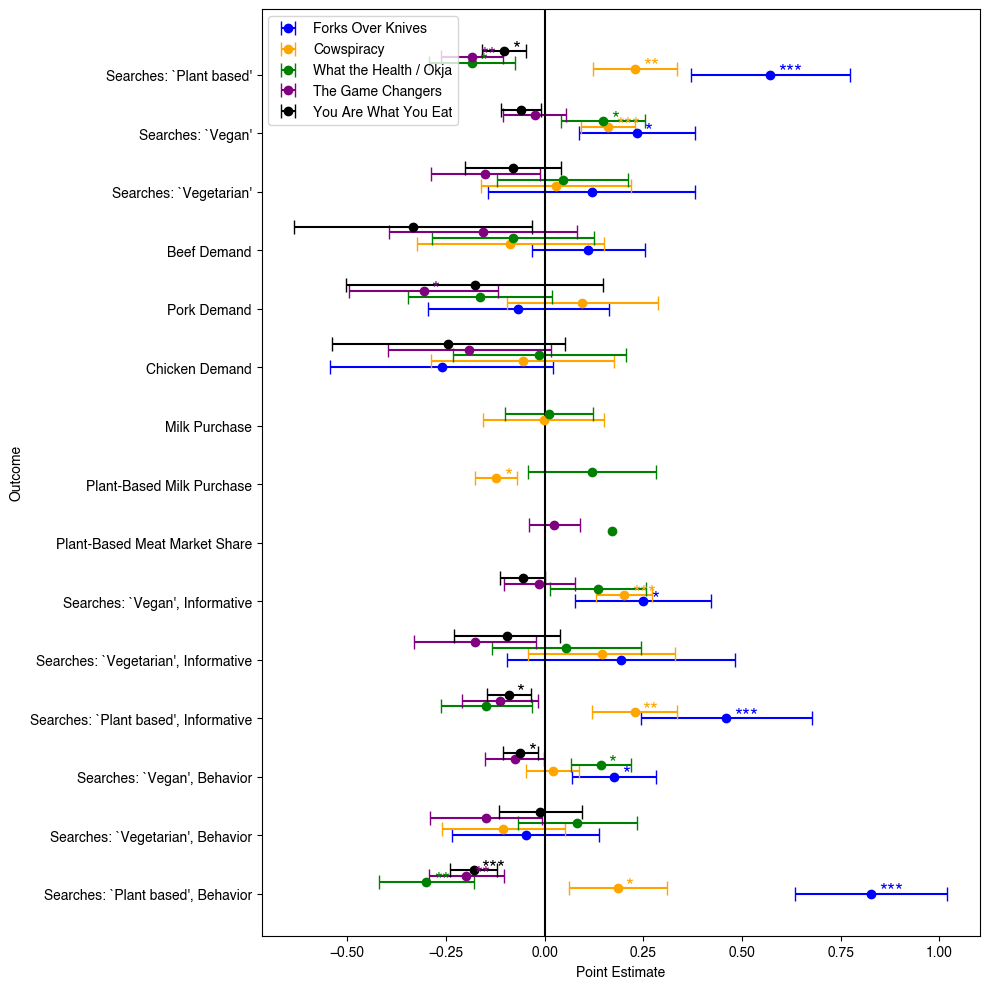

In [173]:
current_pos = 0
increment = 0.1
between_outcome_increment = 0.5

#fig, ax = plt.subplots(figsize=(10,5))
fig, ax = plt.subplots(figsize=(10,10))


for i, outcome in enumerate(outcomes):
    for j, intervention in enumerate(interventions):
        pe = list(data[intervention + '_pe'])[i] #data[outcome][intervention]['pe']
        ci_lower = list(data[intervention + '_ci_lower'])[i] #data[outcome][intervention]['ci_lower']
        ci_upper = list(data[intervention + '_ci_upper'])[i]#data[outcome][intervention]['ci_upper']
        xerr_lower = pe - ci_lower
        xerr_upper = ci_upper - pe
        
        if pe == 0.00000:
            if j == (len(interventions) - 1):
                #plt.axhline(current_pos, color='black')
                current_pos += between_outcome_increment
            
            continue
        
        # Adjust y-coordinate to add spacing between outcome groups
        #i*0.1 + j * 0.01 + i * outcome_spacing*0.1
        ax.errorbar(pe, current_pos, xerr=[[xerr_lower], [xerr_upper]], fmt='o', color=colors[j], capsize=5, label=intvn_map[intervention])
        annot = list(data[intervention + '_an'])[i]
        #print(intervention, i, annot, pe)
        if not isinstance(annot, float):
            #ax.annotate(annot, (pe, current_pos),size=15)
            plt.text(pe+0.02, current_pos-0.05, annot, size=15, color=colors[j])
        current_pos += increment
        
        #print(i, outcome, j, intervention)
        
        if j == (len(interventions) - 1):
            #plt.axhline(current_pos, color='black')
            current_pos += between_outcome_increment

#ax.set_ylim([0,0.5]) 

# Set y-ticks and labels
ax.set_yticks(np.arange(len(outcomes)))
ax.set_yticklabels(outcomes)

# Add legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = {label: handle for handle, label in zip(handles, labels)}
ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper left')

plt.axvline(0, color='black')

ax.set_xlabel('Point Estimate') #(Partial Correlation Coefficient)
ax.set_ylabel('Outcome')

plt.tight_layout()
plt.show()